<h1 style="margin-bottom: 30px; text-align: center;"> Optimising Trading Signals in the UK Financial Markets Using 
    Long Short-Term Memory Networks </h1>

<div align = "left"><font size = "3">  Name: Yi-Lung Tsai
 </font></div> 
<div align = "left"><font size = "3">  Student ID: K23075825 </font></div>  

***

## 1. Data sources and collection

The iShares Core FTSE 100 UCITS ETF GBP (Dist) has been selected as the primary research subject for tracking the performance of the FTSE 100 index in the United Kingdom. Issued by iShares, this ETF comprises the 100 largest listed companies in the UK and is one of the main indicators of UK stock market performance. "UCITS" means that the ETF complies with the EU's Undertakings for Collective Investment in Transferable Securities Directive, which means that the fund meets certain regulatory standards and can be freely marketed within the European Economic Area. "GBP (Dist)" means that the ETF is sterling-denominated and is distributing, meaning that it distributes income (e.g., dividends) to investors on a regular basis rather than reinvesting it.

### 1.1 iShares Core FTSE 100 ETF data (ISF.L):

Historical data for the ETF is obtained from the Yahoo Finance API using the Python package yfinance for the period from 1 January 2010 to 15 April 2024. The data includes the opening price, high price, low price, closing price, and volume of daily trades.

### 1.2 UK Economic Indicators: Three different datasets are used to analyse the dynamics of the UK economy:

* `Unemployment rate`: This component includes quarterly unemployment data for the UK from Q1 1971 to Q1 2023. These data help us understand changes in the labor market and the health of the economy.
* `Consumer Price Inflation (CPI)`: Reflects quarterly consumer price inflation from Q1 1989 to Q1 2023. The inflation rate is an important indicator of economic stability and changes in purchasing power.
* `GDP growth rate`: Shows the quarterly rate of GDP growth in the UK from Q1 1955 to Q1 2023. The GDP growth rate is a key indicator of whether the economy is expanding or contracting.

These three aggregate datasets are primarily sourced from the Office for National Statistics (ONS).

## 2. Methodology

### 2.1 Data Pre-processing

#### 2.1.1 Calculation of Technical Indicators

The pandas_ta library is used to calculate multiple technical indicators for the following ETF data:

* `Relative Strength Index (RSI)`: A momentum oscillator that measures stock price momentum by comparing the average closing price increases and decreases over 14 time units. It scales from 0 to 100, with values over 70 indicating overbought conditions and below 30 indicating oversold conditions.

* `Moving Average Convergence Divergence (MACD)`: Analyses the relationship between short-term and long-term price trends by computing the difference between the 12-unit fast and 26-unit slow EMAs. A 9-unit EMA serves as a signal line to identify trading signals through MACD and signal line crossovers.

* `Bollinger Bands (BB)`: Created by setting two standard deviations above and below a 20-unit SMA. These bands measure price volatility and signal excessive buying or selling when prices touch or exceed the bands.

Additionally, the following indicators are calculated manually:

* `Short-Term Moving Average`: Averages the closing prices of the last 10 periods, highlighting recent price trends.
* `Long-Term Moving Average`: Averages the closing prices over the last 20 periods, offering a view of longer-term price trends and smoothing out price fluctuations.
* `Short-Term Momentum Indicator`: Uses a 10-period moving average of the RSI to detect changes in short-term momentum.
* `Long-Term Momentum Indicator`: Similar to its short-term counterpart but uses a 20-period RSI average to monitor longer-term momentum shifts and market trends.


#### 2.1.2 Data Cleaning and Formatting:

* Deletes rows with missing data.
* Excludes irrelevant columns.
* Standardizes date formats and sets them as DataFrame indexes.


#### 2.1.3 Economic Data Conversion:

* Converts monthly unemployment rates to quarterly data.
* Filters and calculates the average of the data for each quarter.
* Combines various economic indicators on a quarterly basis.

#### 2.1.4 Data Merging:

* Daily financial data is merged with the recalculated data.
* Combines daily financial data with resampled economic data, mapping each day to its quarterly corresponding economic indicator value.

In [2]:
#import yfinance as yf
import pandas as pd
#iSharesCore_FTSE100 = yf.Ticker("ISF.L")
#data = iSharesCore_FTSE100.history(start="2010-01-01", end="2024-04-15")
#data.to_csv("iSharesCore_FTSE100.csv")

In [3]:
# Read the CSV file, which contains data related to the iShares Core FTSE 100 ETF.
ISFframe = pd.read_csv("D:/桌面/iSharesCore_FTSE100.csv")
ISFframe.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2010-01-04 00:00:00+00:00,540.679632,547.649719,538.588630,547.649719,3549031,0.0,0.0,0.0
1,2010-01-05 00:00:00+00:00,546.653933,551.035155,545.658206,549.441956,4149908,0.0,0.0,0.0
2,2010-01-06 00:00:00+00:00,549.641236,551.035278,547.151919,550.338257,3635957,0.0,0.0,0.0
3,2010-01-07 00:00:00+00:00,549.143006,552.229733,547.450260,549.939575,5106946,0.0,0.0,0.0
4,2010-01-08 00:00:00+00:00,548.147585,552.130492,543.567266,550.636902,4840655,0.0,0.0,0.0


In [4]:
# Importing the pandas_ta library for technical analysis functions
import pandas_ta as ta  
# Calculate Relative Strength Index (RSI) and append it to ISFframe
ISFframe.ta.rsi(close='Close', length=14, append=True)
# Calculate Moving Average Convergence Divergence (MACD) and append it to ISFframe
ISFframe.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
# Calculate Bollinger Bands (BBANDS) and append it to ISFframe
ISFframe.ta.bbands(close='Close', length=20, std=2, append=True)
ISFframe.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
0,2010-01-04 00:00:00+00:00,540.679632,547.649719,538.588630,547.649719,3549031,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05 00:00:00+00:00,546.653933,551.035155,545.658206,549.441956,4149908,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06 00:00:00+00:00,549.641236,551.035278,547.151919,550.338257,3635957,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07 00:00:00+00:00,549.143006,552.229733,547.450260,549.939575,5106946,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08 00:00:00+00:00,548.147585,552.130492,543.567266,550.636902,4840655,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove rows with missing values from ISFframe and assign the result to ISFframe_new
ISFframe_new = ISFframe.dropna(axis=0)
# Remove 'Stock Splits' and 'Capital Gains' columns from ISFframe_new because they are not useful
del ISFframe_new['Stock Splits']
del ISFframe_new['Capital Gains']
# Convert the 'Date' column to datetime and extract only the date part
ISFframe_new['Date'] = pd.to_datetime(ISFframe_new['Date'], utc=True).dt.date
#ISFframe_new.set_index('Date', inplace = True)
ISFframe_new.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14404\646005122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISFframe_new['Date'] = pd.to_datetime(ISFframe_new['Date'], utc=True).dt.date


,Date,Open,High,Low,Close,Volume,Dividends,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
33,2010-02-18,528.033818,532.713745,526.241522,532.713745,5877534,0.0,57.486370,-6.174966,4.789584,-10.964551,504.004817,518.748688,533.492558,5.684398,0.973589
34,2010-02-19,527.735114,536.696654,527.735114,535.501770,6497498,0.0,59.713413,-4.584399,5.104121,-9.688520,503.143520,519.112134,535.080748,6.152279,1.013183
35,2010-02-22,538.289853,538.588620,534.904419,535.003967,2325742,0.0,59.117936,-3.325695,5.090260,-8.415955,502.356924,519.684680,537.012437,6.668566,0.942045
36,2010-02-23,537.692316,539.385063,530.323915,531.917114,5491112,0.0,55.426829,-2.547876,4.694464,-7.242339,502.031691,520.013269,537.994847,6.915815,0.831001
37,2010-02-24,526.241522,533.510314,526.241522,532.315430,4563933,0.0,55.810232,-1.877663,4.291741,-6.169404,501.936004,520.685376,539.434748,7.201805,0.810145


In [6]:
# Calculate the short-term moving average (short_ma) using a window of 10 periods on the 'Close' column
ISFframe_new["short_ma"] = ISFframe_new["Close"].rolling(window=10, min_periods=1, center=False).mean()
# Calculate the long-term moving average (long_ma) using a window of 20 periods on the 'Close' column
ISFframe_new["long_ma"] = ISFframe_new["Close"].rolling(window=20, min_periods=1, center=False).mean()
# Calculate the short-term momentum (short_mom) using a window of 10 periods on the 'RSI_14' column
ISFframe_new["short_mom"] = ISFframe_new["RSI_14"].rolling(window=10, min_periods=1, center=False).mean()
# Calculate the long-term momentum (long_mom) using a window of 20 periods on the 'RSI_14' column
ISFframe_new["long_mom"] = ISFframe_new["RSI_14"].rolling(window=20, min_periods=1, center=False).mean()
ISFframe_new.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14404\528380580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISFframe_new["short_ma"] = ISFframe_new["Close"].rolling(window=10,min_periods=1,center=False).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_14404\528380580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISFframe_new["long_ma"] = ISFframe_new["Close"].rolling(window=20,min_periods=1,center=False).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_14404\528380580.py:3: SettingWithCopyWarning

,Date,Open,High,Low,Close,Volume,Dividends,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,short_ma,long_ma,short_mom,long_mom
33,2010-02-18,528.033818,532.713745,526.241522,532.713745,5877534,0.0,57.486370,-6.174966,4.789584,-10.964551,504.004817,518.748688,533.492558,5.684398,0.973589,532.713745,532.713745,57.486370,57.486370
34,2010-02-19,527.735114,536.696654,527.735114,535.501770,6497498,0.0,59.713413,-4.584399,5.104121,-9.688520,503.143520,519.112134,535.080748,6.152279,1.013183,534.107758,534.107758,58.599892,58.599892
35,2010-02-22,538.289853,538.588620,534.904419,535.003967,2325742,0.0,59.117936,-3.325695,5.090260,-8.415955,502.356924,519.684680,537.012437,6.668566,0.942045,534.406494,534.406494,58.772573,58.772573
36,2010-02-23,537.692316,539.385063,530.323915,531.917114,5491112,0.0,55.426829,-2.547876,4.694464,-7.242339,502.031691,520.013269,537.994847,6.915815,0.831001,533.784149,533.784149,57.936137,57.936137
37,2010-02-24,526.241522,533.510314,526.241522,532.315430,4563933,0.0,55.810232,-1.877663,4.291741,-6.169404,501.936004,520.685376,539.434748,7.201805,0.810145,533.490405,533.490405,57.510956,57.510956


In [7]:
import numpy as np  
# Create a new column 'label' in ISFframe_new where 1 indicates short_ma > long_ma, otherwise 0
ISFframe_new['label'] = np.where(ISFframe_new["short_ma"] > ISFframe_new["long_ma"], 1, 0)
ISFframe_new.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14404\2719276660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISFframe_new['label'] = np.where(ISFframe_new["short_ma"] > ISFframe_new["long_ma"], 1, 0)


,Date,Open,High,Low,Close,Volume,Dividends,RSI_14,MACD_12_26_9,MACDh_12_26_9,...,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,short_ma,long_ma,short_mom,long_mom,label
33,2010-02-18,528.033818,532.713745,526.241522,532.713745,5877534,0.0,57.486370,-6.174966,4.789584,...,504.004817,518.748688,533.492558,5.684398,0.973589,532.713745,532.713745,57.486370,57.486370,0
34,2010-02-19,527.735114,536.696654,527.735114,535.501770,6497498,0.0,59.713413,-4.584399,5.104121,...,503.143520,519.112134,535.080748,6.152279,1.013183,534.107758,534.107758,58.599892,58.599892,0
35,2010-02-22,538.289853,538.588620,534.904419,535.003967,2325742,0.0,59.117936,-3.325695,5.090260,...,502.356924,519.684680,537.012437,6.668566,0.942045,534.406494,534.406494,58.772573,58.772573,0
36,2010-02-23,537.692316,539.385063,530.323915,531.917114,5491112,0.0,55.426829,-2.547876,4.694464,...,502.031691,520.013269,537.994847,6.915815,0.831001,533.784149,533.784149,57.936137,57.936137,0
37,2010-02-24,526.241522,533.510314,526.241522,532.315430,4563933,0.0,55.810232,-1.877663,4.291741,...,501.936004,520.685376,539.434748,7.201805,0.810145,533.490405,533.490405,57.510956,57.510956,0


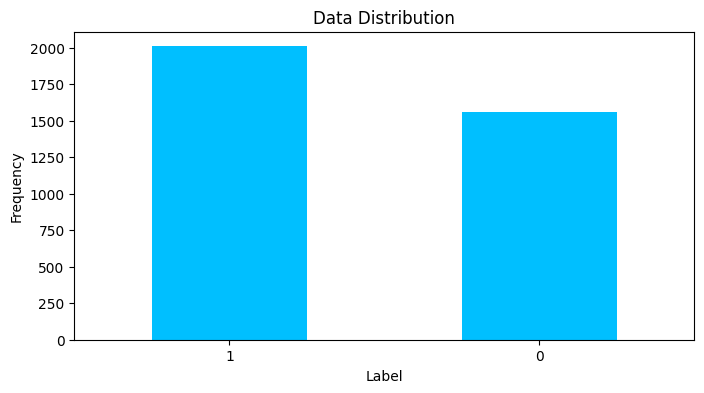

In [8]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8, 4))
# Count the frequency of each label in the 'label' column
label_counts = ISFframe_new['label'].value_counts()
# Plot a bar chart of label frequencies 
plot = label_counts.plot(kind='bar', color='deepskyblue', title='Frequency of Labels')
plt.title('Data Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Read the UK unemployment rate data downloaded from Office for National Statistics 
uk_unemploymentrate = pd.read_csv("D:/桌面/UK unemployment rate.csv")
uk_unemploymentrate.tail()

,Unit,%
830,2022 NOV,3.7
831,2022 DEC,3.7
832,2023 JAN,3.8
833,2023 FEB,3.9
834,2023 MAR,3.8


In [10]:
def month_to_quarter(month):
    # Dictionary mapping months to quarters
    month_to_q = {
        'JAN': 'Q1', 'FEB': 'Q1', 'MAR': 'Q1',
        'APR': 'Q2', 'MAY': 'Q2', 'JUN': 'Q2',
        'JUL': 'Q3', 'AUG': 'Q3', 'SEP': 'Q3',
        'OCT': 'Q4', 'NOV': 'Q4', 'DEC': 'Q4'
    }
    # Return the corresponding quarter for the given month abbreviation
    return month_to_q.get(month, None)

# Apply the month_to_quarter function to the 'Unit' column to derive the quarter
uk_unemploymentrate['Quarter'] = uk_unemploymentrate['Unit'].apply(
    lambda x: f"{x.split()[0]} {month_to_quarter(x.split()[1])}" if len(x.split()) > 1 else x
)

# Filter out rows where Quarter is NaN or contains 'None'
uk_unemploymentrate = uk_unemploymentrate[uk_unemploymentrate['Quarter'].notna() & ~uk_unemploymentrate['Quarter'].str.contains('None')]
# Group the data by Quarter and calculate the mean for numeric columns
uk_unemploymentrate = uk_unemploymentrate.groupby('Quarter').mean(numeric_only=True).reset_index()
# Filter the data for the range '2010 Q1' to '2023 Q1' inclusive
filtered_data1 = uk_unemploymentrate[(uk_unemploymentrate['Quarter'] >= '2010 Q1') & (uk_unemploymentrate['Quarter'] <= '2023 Q1')]
filtered_data1.rename(columns={'%': 'Unemployment Rate in the UK(%)'}, inplace=True)
filtered_data1.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14404\939536926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1.rename(columns={ '%' : 'Unemployment Rate in the UK(%)' },inplace = True)


,Quarter,Unemployment Rate in the UK(%)
156,2010 Q1,7.966667
157,2010 Q2,7.866667
158,2010 Q3,7.833333
159,2010 Q4,7.900000
160,2011 Q1,7.766667


In [11]:
# Read the UK consumer price inflation data from Office for National Statistics 
uk_consumerpriceinflation = pd.read_csv("D:/桌面/UK consumer price inflation.csv")
uk_consumerpriceinflation.rename(columns={'Unit': 'Quarter', '%': 'Consumer Price Inflation in the UK(%)'}, inplace=True)
# Filter the data for the range '2010 Q1' to '2023 Q1' inclusive
filtered_data2 = uk_consumerpriceinflation[(uk_consumerpriceinflation['Quarter'] >= '2010 Q1') & (uk_consumerpriceinflation['Quarter'] <= '2023 Q1')]
filtered_data2.head()

,Quarter,Consumer Price Inflation in the UK(%)
84,2010 Q1,2.4
85,2010 Q2,2.5
86,2010 Q3,2.3
87,2010 Q4,2.7
88,2011 Q1,3.5


In [12]:
# Read the UK GDP data from Office for National Statistics
uk_gdp = pd.read_csv("D:/桌面/UK GDP.csv")
uk_gdp.rename(columns={'Unit': 'Quarter', '%': 'GDP in the UK(%)'}, inplace=True)
# Filter the data for the range '2010 Q1' to '2023 Q1' inclusive
filtered_data3 = uk_gdp[(uk_gdp['Quarter'] >= '2010 Q1') & (uk_gdp['Quarter'] <= '2023 Q1')]
filtered_data3.head()

,Quarter,GDP in the UK(%)
219,2010 Q1,0.9
220,2010 Q2,1.1
221,2010 Q3,0.6
222,2010 Q4,0.1
223,2011 Q1,0.3


In [13]:
# Merge filtered_data1 and filtered_data2 on the 'Quarter' column using an outer join
merged_data = pd.merge(filtered_data1, filtered_data2, on='Quarter', how='outer')
# Merge merged_data with filtered_data3 on the 'Quarter' column using an outer join
macrofactors_data = pd.merge(merged_data, filtered_data3, on='Quarter', how='outer')
macrofactors_data.head()

,Quarter,Unemployment Rate in the UK(%),Consumer Price Inflation in the UK(%),GDP in the UK(%)
0,2010 Q1,7.966667,2.4,0.9
1,2010 Q2,7.866667,2.5,1.1
2,2010 Q3,7.833333,2.3,0.6
3,2010 Q4,7.900000,2.7,0.1
4,2011 Q1,7.766667,3.5,0.3


In [14]:
# Convert the 'Date' column in ISFframe_new to datetime format and set it as the index
ISFframe_new['Date'] = pd.to_datetime(ISFframe_new['Date'])
ISFframe_new.set_index('Date', inplace=True)
# Convert the 'Quarter' column in macrofactors_data to datetime format and set it as the index
macrofactors_data['Quarter'] = pd.to_datetime(macrofactors_data['Quarter'].str.replace(' Q', '-Q'), errors='coerce')
macrofactors_data.set_index('Quarter', inplace=True)
# Resample macrofactors_data to daily frequency, forward fill missing values, and reindex based on ISFframe_new's index
daily_macro_data = macrofactors_data.resample('D').ffill().reindex(ISFframe_new.index, method='ffill')
# Combine ISFframe_new and daily_macro_data based on their indexes
combined_data = ISFframe_new.join(daily_macro_data)
combined_data.tail(50)

C:\Users\user\AppData\Local\Temp\ipykernel_14404\1327065247.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISFframe_new['Date'] = pd.to_datetime(ISFframe_new['Date'])
C:\Users\user\AppData\Local\Temp\ipykernel_14404\1327065247.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  macrofactors_data['Quarter'] = pd.to_datetime(macrofactors_data['Quarter'].str.replace(' Q', '-Q'), errors='coerce')


,Open,High,Low,Close,Volume,Dividends,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,BBB_20_2.0,BBP_20_2.0,short_ma,long_ma,short_mom,long_mom,label,Unemployment Rate in the UK(%),Consumer Price Inflation in the UK(%),GDP in the UK(%)
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-01,742.853741,747.453430,740.953835,742.553711,1024501,0.0000,53.798973,0.254425,1.144664,-0.890239,...,4.093182,0.630978,737.504059,738.593994,48.421833,47.372614,0,3.833333,9.0,0.1
2024-02-02,746.953472,747.342425,740.953846,741.753784,3194330,0.0000,52.710431,0.385104,1.020274,-0.635171,...,3.953334,0.618709,738.973969,738.289011,50.204913,47.208178,1,3.833333,9.0,0.1
2024-02-05,742.553703,746.695474,739.953890,741.453796,3836683,0.0000,52.283192,0.459168,0.875471,-0.416303,...,3.773202,0.626231,740.133893,737.939032,51.531802,46.986878,1,3.833333,9.0,0.1
2024-02-06,746.253518,748.953362,743.253704,747.853455,4994435,0.0000,59.773867,1.022477,1.151024,-0.128547,...,3.780782,0.854994,741.953784,737.949033,53.626723,47.204329,1,3.833333,9.0,0.1
2024-02-07,748.353424,749.453331,742.653766,742.953735,1899466,0.0000,52.923732,1.061303,0.951880,0.109423,...,3.749787,0.683408,742.893732,737.879037,54.470075,47.332606,1,3.833333,9.0,0.1
2024-02-08,743.853662,745.053539,739.053913,739.353943,2100957,0.0000,48.523915,0.792465,0.546433,0.246031,...,3.753491,0.550902,743.453699,737.944034,54.845194,47.639250,1,3.833333,9.0,0.1
2024-02-09,739.053940,740.653877,735.470179,736.854126,1828317,0.0000,45.683641,0.373390,0.101887,0.271503,...,3.712244,0.470606,742.703748,737.659055,53.693262,47.491366,1,3.833333,9.0,0.1
2024-02-12,737.854040,738.853978,735.354196,737.454041,1831608,0.0000,46.493073,0.088656,-0.146278,0.234934,...,3.703680,0.496705,742.033783,737.544061,52.648309,47.548783,1,3.833333,9.0,0.1
2024-02-13,737.254076,738.154044,729.454574,731.154480,1538903,0.0000,39.787950,-0.637965,-0.698319,0.060354,...,3.777370,0.279016,740.453882,737.309076,50.656291,47.480163,1,3.833333,9.0,0.1


### 2.2 Constructing SVM Models

#### 2.2.1 SVM Model Configuration and Training

In this section, we design a binary categorical SVM model designed to efficiently deal with the linear categorisation problem. SVM demonstrates excellent performance when dealing with high-dimensional data and small sample datasets, and is capable of capturing non-linear relationships in the data through suitable kernel functions.

* `Feature Processing`: Firstly, non-feature columns (e.g., identifying information such as dates) are removed from the dataset, and only features relevant to the prediction target are retained. Further, the influence of scale between different features is eliminated through standardisation to improve the prediction accuracy of the model.

* `Data Set Partitioning`: The data are partitioned into a training set and a test set in the ratio of 70% and 30%, respectively. In addition, 20% of the training set is divided into a validation set, which is used for model tuning and early stopping to prevent over-simulation. The training data range from 2010-02-18 to 2020-01-13; the test data range from 2020-01-14 to 2024-04-11.

* `Model Construction`: The SVM model was built using the SVC module of Scikit-learn, and the linear kernel function was chosen for training. This is because the linear kernel works well in many cases, especially when the number of features is larger than the number of samples.

* `Hyper-parameter Setting`: In this case, we set kernel='linear' to specify the use of the linear kernel and random_state=42 to ensure the repeatability of model training.

* `Model Training`: The model is trained on standardised training data. This step involves finding the optimal decision boundary to distinguish between different classes.

#### 2.2.2 SVM Model Loss and Accuracy 

* `Model Evaluation`: The model is evaluated using a validation set with key metrics such as accuracy, precision, recall, and F1 score.

* `Performance Results`: In this case, the SVM model achieved an accuracy of 94.81% on the validation set, showing that the model has good classification results. The accuracy, recall, and F1 score show that the model has a balanced ability to identify positive and negative categories.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Drop the 'label' column to extract features
features = combined_data.drop('label', axis=1)
# Extract labels into a DataFrame
labels = pd.DataFrame({"label": combined_data.label})

# Split the data into training and testing sets (70% training, 30% testing)
split = int(len(combined_data) * 0.7)
svm_X_train = features.iloc[:split, :].copy()
svm_X_test = features.iloc[split:, :].copy()
svm_y_train = labels.iloc[:split, :].copy()
svm_y_test = labels.iloc[split:, :].copy()

# Further split the training data to include a validation set (20% of training data)
svm_X_train, X_val, svm_y_train, y_val = train_test_split(svm_X_train, svm_y_train, test_size=0.20, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(svm_X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(svm_X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, svm_y_train['label'].values.ravel())  # Corrected to convert to NumPy array then ravel

# Evaluate the model on the validation set
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

# Print validation accuracy and classification report
print(val_accuracy)
print(val_report)

0.9481037924151696
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       222
           1       0.96      0.94      0.95       279

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.95      0.95      0.95       501



In [35]:
# Use the SVM model to make predictions on the scaled test data
svm_predict = svm_model.predict(X_test_scaled)
# Create a DataFrame to store the results
svm_result = pd.DataFrame({"Close": combined_data.iloc[split:]["Close"]})
# Add the real labels from svm_y_test to the DataFrame
svm_result["Real"] = svm_y_test['label']
# Add the SVM predictions to the DataFrame
svm_result["SVM Predict"] = list(svm_predict)
svm_result.tail(10)

,Close,Real,SVM Predict
Date,,,
2020-01-14,750.438477,1,1
2020-01-15,752.335571,1,1
2020-01-16,749.839294,1,1
2020-01-17,755.131165,1,1
2020-01-20,753.333923,1,1
2020-01-21,749.639648,1,1
2020-01-22,745.246460,1,1
2020-01-23,739.056091,1,1
2020-01-24,747.143555,1,1


In [52]:
# Calculate the accuracy
accuracy = accuracy_score(svm_y_test, svm_predict)
print("SVM model accuracy for test dataset:", accuracy)

SVM model accuracy for test dataset: 0.9225746268656716


C:\Users\user\2\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


### 2.3 Constructing LSTM Models

#### 2.3.1 LSTM Model Configuration and Training

The goal is to design a binary categorical LSTM neural network. The architecture adopts stacked LSTM layers as it is beneficial to capture more complex time-series features. The LSTM is often followed by a dropout layer to avoid overfitting and a batch normalisation layer to speed up convergence and stabilise the learning process. The LSTM model is designed to be a binary categorical LSTM neural network.

* `Number of Layers`: Choose the appropriate number of layers according to the complexity of the task. Each additional layer increases the computational cost. In this study, three LSTM layers are used to make the model structure complex and suitable for solving non-simple problems.
* `Number of Units`: The more units, the better the learning ability, but too many units may lead to overfitting. In this model, each LSTM layer has 35 units.
* `Dropout Ratio`: To reduce the risk of overfitting, it is usually set between 0.2 and 0.5. In this research, a dropout ratio of 0.3 was chosen to improve the generalisation ability of the model.
* `Data Processing`: In the code, firstly the non-specific columns were removed and then the data were standardised. The data is sliced into a training set and a test set by 70% and 30%, respectively.
* `Data Set Partitioning`: The time range of the training data is from 2010-02-18 to 2020-01-13, and the time range of the test data is from 2020-01-14 to 2024-04-11.
* `Model Construction`: In order to train the LSTM model, the data needs to be reconstructed into a format suitable for time series analysis. This usually means that the data needs to be reconstructed into a 3D format, i.e., [number of samples, time step, number of features]. Model construction using Keras consists of several LSTM layers with a dropout layer, a batch normalisation layer, and finally a dense layer using a sigmoid activation function for binary classification tasks.
* `Model Compilation and Overview`: The model is compiled using the Adam optimizer and the binary cross-entropy loss function.


In [18]:
# Drop the 'label' column to extract features
# Extract labels into a DataFrame
X = combined_data.drop('label', axis=1)
from sklearn.preprocessing import StandardScaler
X[X.columns] = StandardScaler().fit_transform(X[X.columns])
y = pd.DataFrame({"label": combined_data.label})

# Split the data into training and testing sets (70% training, 30% testing)
split = int(len(combined_data) * 0.7)
train_X = X.iloc[:split, :].copy()
test_X = X.iloc[split:].copy()
train_y = y.iloc[:split, :].copy()
test_y = y.iloc[split:].copy()

# Reshape the data for LSTM input
X_train, y_train, X_test, y_test = np.array(train_X), np.array(train_y), np.array(test_X), np.array(test_y)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# No reshaping needed for y_train and y_test if the last layer is a Dense layer expecting a single output
# Since y_train is already an array of shape (n_samples, 1), we don't need to reshape it further

# Import required libraries for building the LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization

# Initialize and build the model
regressor = Sequential()
regressor.add(LSTM(units=35, return_sequences=True, input_shape=(1, X_train.shape[2])))
regressor.add(BatchNormalization())
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=35, return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=35, return_sequences=False))  # Note the change here to not return sequences
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1, activation="sigmoid"))  # Output layer for binary classification

# Compile the model
regressor.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
regressor.summary()

C:\Users\user\2\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 35)               │           8,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 35)               │             140 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 35)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 35)               │           9,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 35)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 35)                  │           9,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 35)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,176 (110.06 KB)

 Trainable params: 28,106 (109.79 KB)

 Non-trainable params: 70 (280.00 B)

* `Layer (type)`: This column shows the type of each layer. In this model, this includes LSTM layers, BatchNormalisation layers, dropout layers, and fully connected layers (Dense).
* `Output Shape`: This column shows the output shape of each layer. For example, the output shape of the LSTM layer is (None, 1, 35), which means that the output is a 3D tensor with the first dimension being the batch size (None means variable batch size), the second dimension being the time step (1), and the third dimension being the number of features (35).
* `Param #`: This column shows the number of parameters for each layer. In neural networks, parameters are usually weights and biases. For example, the LSTM layer has 8,120 parameters.
* `Total parameters`: This column shows the total number of parameters in the model, including trainable and untrainable parameters. In this model, the total number of parameters is 28,176.
* `Trainable params`: This column shows the number of parameters that can be updated by training. In this model, the number of parameters that can be updated by training is 28,106.
* `Non-trainable params`: This column shows the number of parameters that cannot be updated by training. In this model, the number of non-trainable parameters is 70.

#### 2.3.2 LSTM Model Loss and Accuracy

In this research, the previously segmented training set was used to train the model. The model was set to process 200 data points per batch, and it was determined that the model would be adequately trained by setting 100 epochs to traverse the entire dataset 100 times. 20% of the training data is kept as a validation set to evaluate the model performance during the training process and to perform hyper-parameter tuning. The results of the model evaluation show that the accuracy of the training set is 97.6%, and the accuracy of the test set is 96.41%, indicating that the LSTM model has been well trained.


In [20]:
# Train the LSTM model on the training data
train_history = regressor.fit(X_train, y_train,
                               batch_size=200,  # Number of samples per gradient update
                               epochs=100,  # Number of epochs to train the model
                               verbose=2,validation_split=0.2)  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)

Epoch 1/100
10/10 - 4s - 415ms/step - accuracy: 0.6235 - loss: 0.6856 - val_accuracy: 0.5389 - val_loss: 0.6897
Epoch 2/100
10/10 - 0s - 9ms/step - accuracy: 0.7685 - loss: 0.6592 - val_accuracy: 0.5828 - val_loss: 0.6835
Epoch 3/100
10/10 - 0s - 9ms/step - accuracy: 0.8015 - loss: 0.6206 - val_accuracy: 0.6946 - val_loss: 0.6711
Epoch 4/100
10/10 - 0s - 9ms/step - accuracy: 0.8090 - loss: 0.5644 - val_accuracy: 0.7824 - val_loss: 0.6490
Epoch 5/100
10/10 - 0s - 8ms/step - accuracy: 0.8325 - loss: 0.4928 - val_accuracy: 0.8144 - val_loss: 0.6151
Epoch 6/100
10/10 - 0s - 10ms/step - accuracy: 0.8430 - loss: 0.4288 - val_accuracy: 0.8244 - val_loss: 0.5734
Epoch 7/100
10/10 - 0s - 11ms/step - accuracy: 0.8510 - loss: 0.3754 - val_accuracy: 0.8283 - val_loss: 0.5335
Epoch 8/100
10/10 - 0s - 10ms/step - accuracy: 0.8535 - loss: 0.3401 - val_accuracy: 0.8343 - val_loss: 0.5049
Epoch 9/100
10/10 - 0s - 10ms/step - accuracy: 0.8690 - loss: 0.3068 - val_accuracy: 0.8323 - val_loss: 0.4846
Epoc

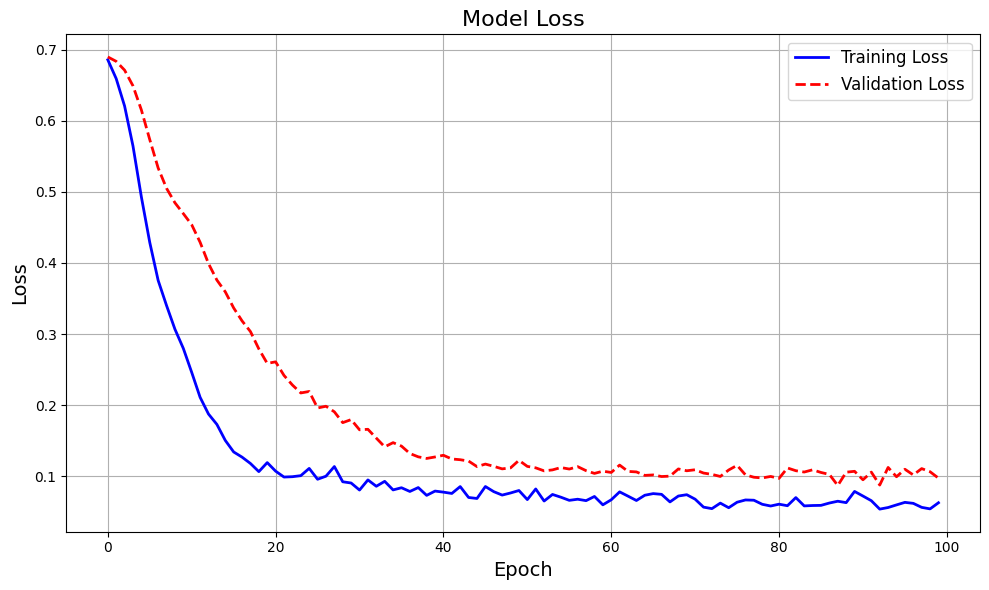

In [21]:
# Extract loss values
loss = train_history.history["loss"]
val_loss = train_history.history["val_loss"]
plt.figure(figsize=(10, 6))  

# Plot training loss
plt.plot(loss, label="Training Loss", color="blue", linestyle="-", linewidth=2)
# Plot validation loss
plt.plot(val_loss, label="Validation Loss", color="red", linestyle="--", linewidth=2)

plt.title("Model Loss", fontsize=16)  
plt.xlabel("Epoch", fontsize=14)  
plt.ylabel("Loss", fontsize=14)  
plt.legend(fontsize=12)  
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  

As depicted in the figure, during the model training process, we observe that both the training loss and the validation loss decrease gradually over time, while the accuracy of the model increases. The curves of training loss and validation loss show convergence. This convergence indicates that the model has reached a balance in the learning process, able to learn the training data while maintaining the ability to generalise to new data, showing that no overfitting has occurred.

#### 2.3.3 Importance of LSTM model features

Firstly, the baseline MAE was determined by performing the prediction on the test set without disrupting any of the features, providing a reference point for the model performance. Next, each feature was disrupted one by one, and the new MAE was calculated to evaluate its impact on the model prediction performance. Comparison of the disruption of all features with the original MAE allows us to identify the features that have the greatest impact on the prediction of the LSTM model.

In [23]:
from tqdm.notebook import tqdm
results = []
print('Computing LSTM feature importance...')


if X_test.ndim == 2:  
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

oof_preds = regressor.predict(X_test, verbose=0).squeeze()
baseline_mae = np.mean(np.abs(oof_preds - y_test.squeeze()))
results.append({'feature': 'BASELINE', 'mae': baseline_mae})

# Iterate over each feature to shuffle
for k in tqdm(range(X_test.shape[2])):  
    
    save_col = X_test[:, :, k].copy()
    np.random.shuffle(X_test[:, :, k])
    oof_preds = regressor.predict(X_test, verbose=0).squeeze()
    mae = np.mean(np.abs(oof_preds - y_test.squeeze()))
    results.append({'feature': test_X.columns[k], 'mae': mae})
    
    # Restore original data
    X_test[:, :, k] = save_col

Computing LSTM feature importance...


  0%|          | 0/22 [00:00<?, ?it/s]

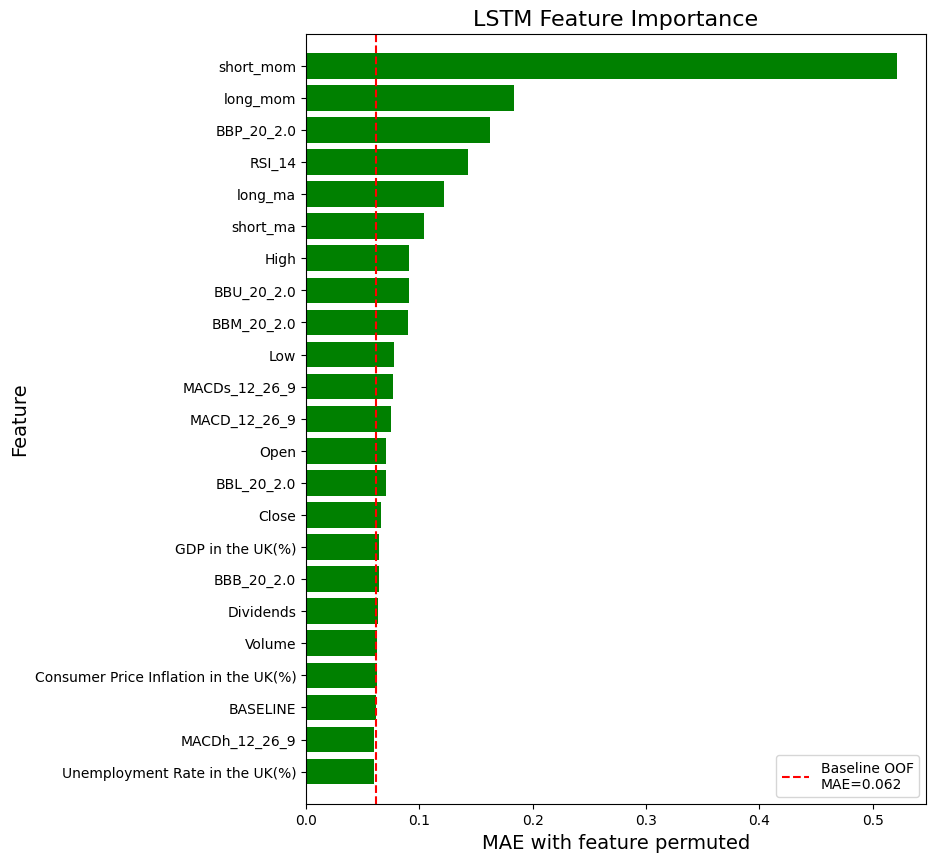

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(results)
df = df.sort_values('mae')
plt.figure(figsize=(8,10))

# Set the color of the bars to green
plt.barh(np.arange(len(list(test_X.columns))+1), df.mae, color='green')

plt.yticks(np.arange(len(list(test_X.columns))+1), df.feature.values)
plt.title('LSTM Feature Importance', size=16)
plt.ylim((-1, len(list(test_X.columns))+1))
plt.plot([baseline_mae, baseline_mae], [-1, len(list(test_X.columns))+1], '--', color='red',
         label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
plt.xlabel(f'MAE with feature permuted', size=14)
plt.ylabel('Feature', size=14)
plt.legend()
plt.show()

It can be seen that in terms of LSTM prediction performance, the top three most influential features are the short-term and long-term momentum indicators, and the Bollinger Bands percentage of the 20-day moving average. Conversely, for the general economic indicators, only the GDP is significantly helpful, and the Unemployment Rate is not helpful for the prediction.

## 3. Results and Discussion

### 3.1 Performance of SVM and LSTM Models in the Test Set

In this research, two different models, SVM and LSTM, are used for prediction, and the performance of these models on the test set is evaluated. The following SVM and LSTM models achieved an accuracy of 92.26% and 90.53% on the test set, respectively. The specific performance is as follows:

* `SVM Model`: The accuracy of the SVM model on the test set is 92.26%. This indicates that the SVM model has high prediction accuracy, is suitable for handling linearly separable datasets, and can effectively cope with high-dimensional data.
* `LSTM Model`: The accuracy of the LSTM model is 90.53%, which is slightly lower than the SVM model. However, the LSTM model is particularly suitable for handling sequential data, allowing it to capture long-term dependencies in the time series.

In [27]:
# Use the LSTM model to make predictions on the test data
predict_x = regressor.predict(X_test)
# Create a DataFrame to store the LSTM predictions
df_predict = pd.DataFrame(predict_x, columns=["Buy"])
# Convert the predictions to binary actions based on a threshold of 0.5
df_predict["Action"] = np.where(df_predict["Buy"] > 0.5, 1, 0)
# Create a DataFrame to store the results
result = pd.DataFrame({"Close": combined_data.iloc[split:]["Close"]})
# Add the real labels from test_y to the DataFrame
result["Real"] = test_y["label"]
# Add the LSTM predictions to the DataFrame
result["LSTM Predict"] = list(df_predict["Action"])
result.tail(50)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Close,Real,LSTM Predict
Date,,,
2024-02-01,742.553711,0,0
2024-02-02,741.753784,1,1
2024-02-05,741.453796,1,1
2024-02-06,747.853455,1,1
2024-02-07,742.953735,1,1
2024-02-08,739.353943,1,1
2024-02-09,736.854126,1,1
2024-02-12,737.454041,1,1
2024-02-13,731.154480,1,1


In [56]:
print("SVM model accuracy for test dataset:", accuracy)  # Print SVM model accuracy for the test dataset
print("LSTM model accuracy for test dataset ")  # Print LSTM model accuracy for the test dataset
# Evaluate the LSTM model on the test dataset and print the results
evaluation_results = regressor.evaluate(X_test, y_test, verbose=1)

SVM model accuracy for test dataset: 0.9225746268656716
LSTM model accuracy for test dataset 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9053 - loss: 0.2435


[0.1455179750919342, 0.9421641826629639]

### 3.2 Strategy Backtesting

The graph illustrates the cumulative return trend of four different strategies over a period of approximately four years, from the beginning of 2020 to the beginning of 2024. The four strategies are: labeling strategy based on LSTM prediction (orange line), labeling strategy based on SVM prediction (blue line), strategy based on actual labeling (green line), and market performance (red line).

From the backtesting results graph, it's evident that the LSTM-based strategy ultimately achieves the highest cumulative return, represented by the orange line, indicating that the LSTM model exhibits relatively better predictive performance during that period. The SVM-based strategy (blue line) also demonstrates steady growth, although the final gain is slightly lower than the LSTM strategy. In contrast, the real labeling strategy (green line) underperforms both forecasting models for most of the time, but shows some improvement in certain periods. The market performance (red line) gradually recovers after an early drop, but appears to have the lowest growth over the entire period.

Analysing the data table, we find that the cumulative return on April 11, 2024, is as follows:

* `LSTM prediction strategy`: 1.103326
* `SVM forecasting strategy`: 1.055805
* `Actual labeling strategy`: 0.925966
* `Market Performance`: 1.041924

This implies that if one starts investing in these strategies at the beginning of 2020, by April 11, 2024:

* The investment value of the strategies based on LSTM forecasts may have increased by about 10.33%.
* The value of investments in SVM-based strategies may have increased by approximately 5.58%.
* The value of the investment may have decreased by approximately 7.4% when trading based solely on actual buy and sell labels.
* The market as a whole grew by about 4.19%.

This demonstrates that strategies utilising LSTM or SVM models for forecasting not only outperform the market but also significantly surpass strategies that trade solely on actual labels. Additionally, such model-driven strategies may help protect investments from significant losses in volatile market conditions.


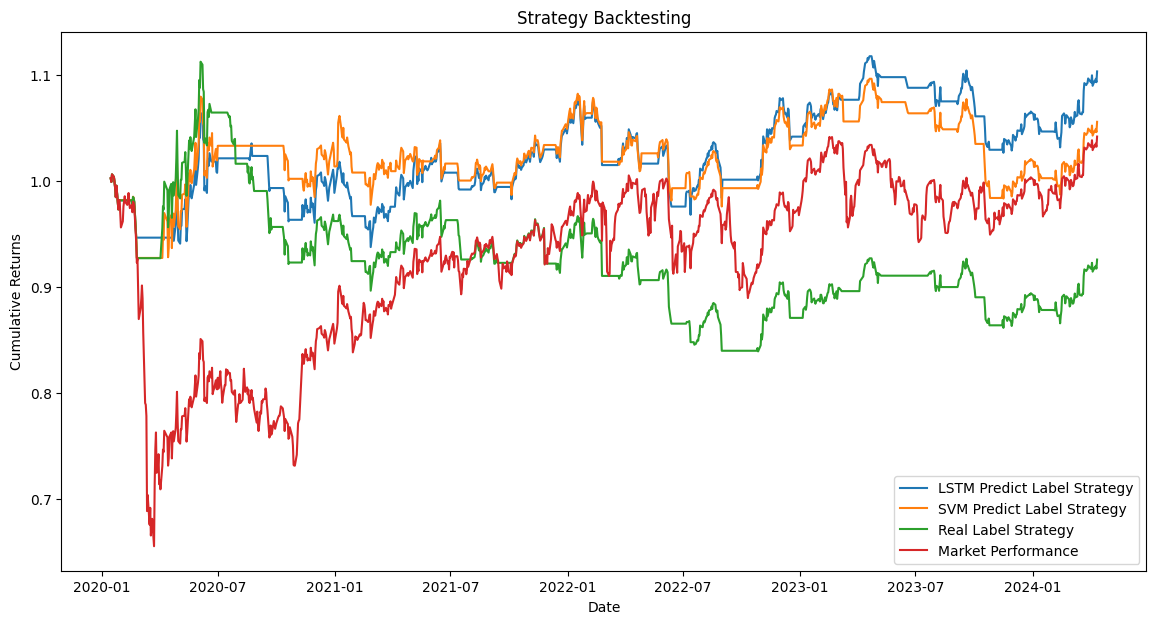

In [28]:
# Create a copy of the result DataFrame for backtesting
backtest = result.copy()

# Calculate daily returns
backtest['daily_returns'] = backtest['Close'].pct_change()

# Calculate strategy returns based on LSTM predictions, SVM predictions, and real labels
backtest['LSTM predict_strategy_returns'] = backtest['daily_returns'] * backtest['LSTM Predict'].shift(1)
backtest['SVM predict_strategy_returns'] = backtest['daily_returns'] * svm_result['SVM Predict'].shift(1)
backtest['real_strategy_returns'] = backtest['daily_returns'] * backtest['Real'].shift(1)

# Calculate cumulative returns for each strategy
backtest['cumulative_LSTM predict_returns'] = (1 + backtest['LSTM predict_strategy_returns']).cumprod()
backtest['cumulative_SVM predict_returns'] = (1 + backtest['SVM predict_strategy_returns']).cumprod()
backtest['cumulative_real_returns'] = (1 + backtest['real_strategy_returns']).cumprod()
backtest['cumulative_market_returns'] = (1 + backtest['daily_returns']).cumprod()

# Plot cumulative returns for each strategy and market performance
plt.figure(figsize=(14, 7))
plt.plot(backtest.index, backtest['cumulative_LSTM predict_returns'], label='LSTM Predict Label Strategy')
plt.plot(backtest.index, backtest['cumulative_SVM predict_returns'], label='SVM Predict Label Strategy')
plt.plot(backtest.index, backtest['cumulative_real_returns'], label='Real Label Strategy')
plt.plot(backtest.index, backtest['cumulative_market_returns'], label='Market Performance')
plt.title('Strategy Backtesting')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [29]:
# Extract the last row of the DataFrame containing cumulative returns for each strategy and market performance
backtest[['cumulative_LSTM predict_returns','cumulative_SVM predict_returns','cumulative_real_returns','cumulative_market_returns']][-1:]

,cumulative_LSTM predict_returns,cumulative_SVM predict_returns,cumulative_real_returns,cumulative_market_returns
Date,,,,
2024-04-11,1.103326,1.055805,0.925966,1.041924
